##**House Prices**

Predict sales prices and feature engineering

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from scipy import stats
from scipy.stats import norm, skew
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LassoCV

In [2]:
# Load files
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
pd.set_option('max_columns', None)

##**Exploratory data analysis (EDA):**

In [3]:
# Print all column names
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train_df.shape

(1460, 81)

In [5]:
# Print unique entry for all categorical variables 
col_name = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2',
            'BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
            'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath',
            'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType',
            'GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

for i in col_name:
    print(train_df[i].value_counts())
    print('*'*30)


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
******************************
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
******************************
Pave    1454
Grvl       6
Name: Street, dtype: int64
******************************
Grvl    50
Pave    41
Name: Alley, dtype: int64
******************************
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
******************************
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
******************************
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
******************************
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
******************************
Gtl    1382
Mod      65

In [6]:
col = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
       'LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',
       'MoSold','YrSold','SalePrice']
train_df[col]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003.0,548,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976.0,460,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001.0,608,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1998.0,642,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000.0,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,694,0,1647,1999.0,460,0,40,0,0,0,0,0,8,2007,175000
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1978.0,500,349,0,0,0,0,0,0,2,2010,210000
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,1941.0,252,0,60,0,0,0,0,2500,5,2010,266500
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1950.0,240,366,0,112,0,0,0,0,4,2010,142125


##**Data Visualisation**

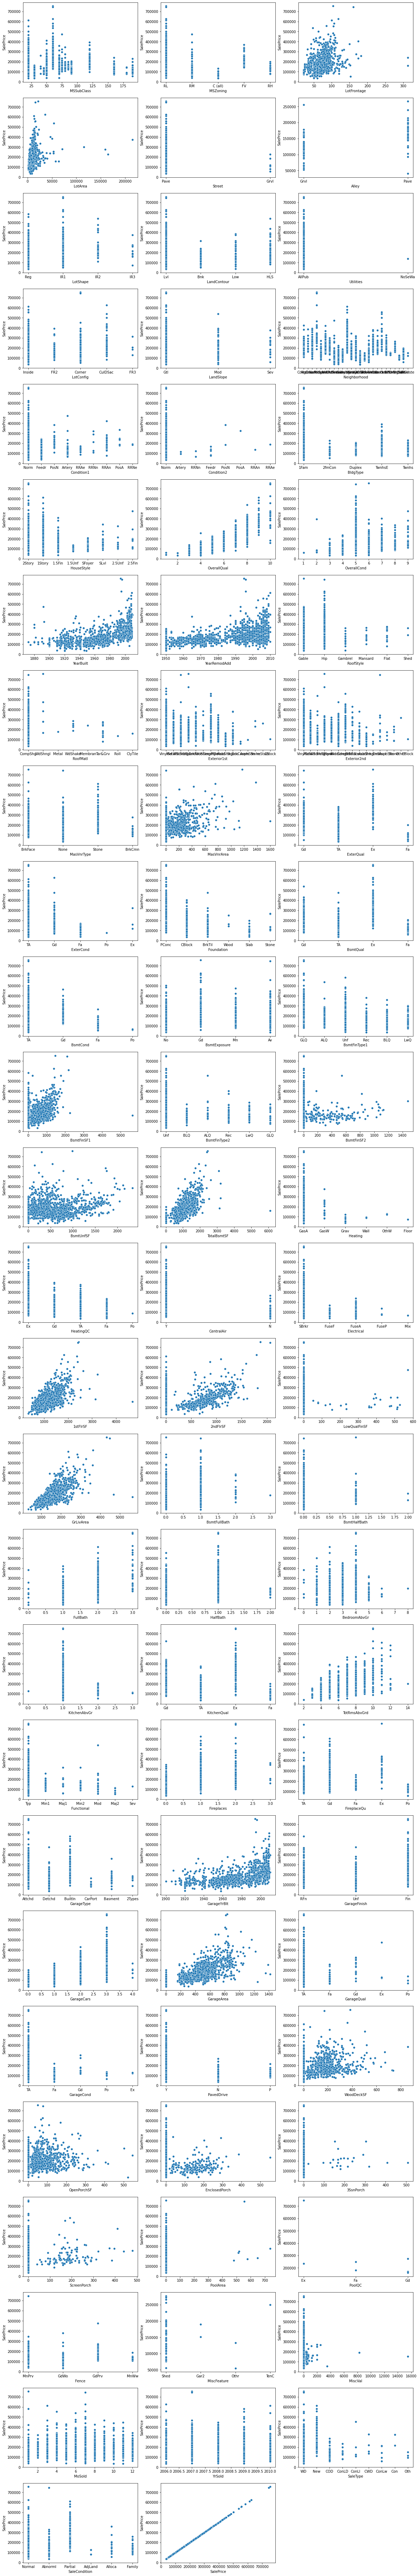

In [7]:
# Plot all data points for each feature vs sale price. This helps us to find patterns if there.
plt.figure(figsize=(20,150))
col_name_all = train_df.columns
for i in range(1, 81):
    plt.subplot(30,3,i)
    sns.scatterplot(x = col_name_all[i], y = 'SalePrice', data = train_df)


In [8]:
#Statistics summary for Sale Price.
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


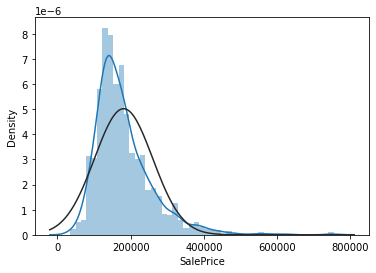

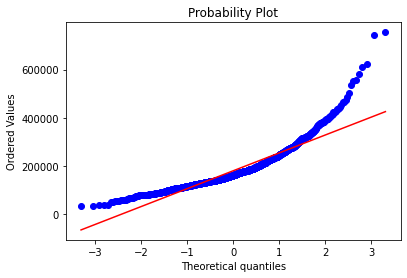

In [9]:
#Find distribution for sales data
sns.distplot(train_df.SalePrice , fit =norm)

#QQ - plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


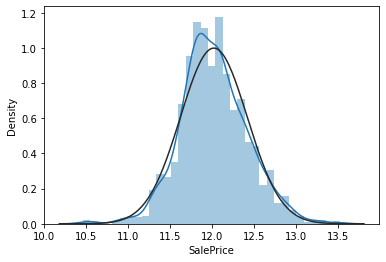

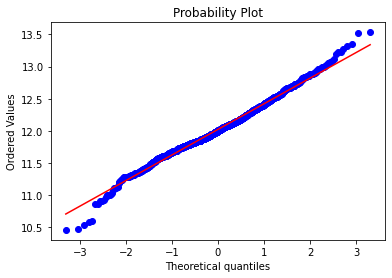

In [10]:
#Log-transformation of the target variable
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

sns.distplot(train_df.SalePrice , fit =norm)

#QQ - plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

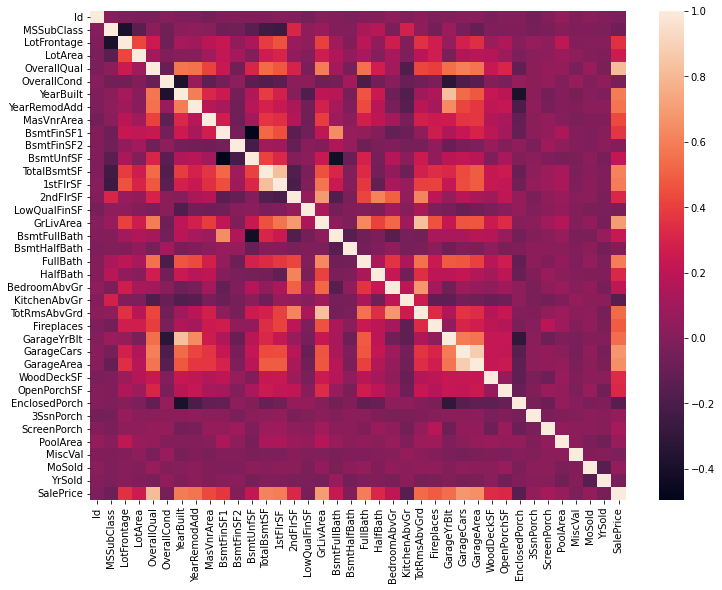

In [11]:
# Let's find the correlation matrix
corr = train_df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corr)

##**Missing Values**

In [12]:
# Get the missing values
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']>0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [13]:
# drop null col
train_df = train_df.drop((missing_data[missing_data.Total > 1]).index, axis = 1)
# drop null rows
train_df.dropna(subset=['Electrical'], inplace=True)
# check for null
train_df.isnull().sum().max()

0

In [14]:
# Col with uneven data distribution
col1 = ['Street','LandContour','Utilities','LandSlope','Condition1','Condition2','RoofMatl','Exterior2nd','ExterCond','Heating','CentralAir','Electrical',
        'BsmtHalfBath','KitchenAbvGr','Functional','PavedDrive','SaleType','SaleCondition']

# Col which needs to reduce cardinality.
col2 = ['MSSubClass','MSZoning','LotShape','LotConfig','Neighborhood','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','Exterior1st',
        'ExterQual','Foundation','HeatingQC','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars']

In [15]:
#Reducing cardinality of categorical features
train_df['MSSubClass']= train_df['MSSubClass'].astype(str)
train_df['MSSubClass'] = pd.DataFrame(['50' if (x not in ['20', '60']) else x for x in train_df['MSSubClass']])

train_df['MSZoning'] = pd.DataFrame(['RM' if (x not in ['RL']) else x for x in train_df['MSZoning']])

train_df['LotShape'] = pd.DataFrame(['IR1' if (x not in ['Reg']) else x for x in train_df['LotShape']])

train_df['LotConfig'] = pd.DataFrame(['Corner' if (x not in ['Inside']) else x for x in train_df['LotConfig']])

train_df['Neighborhood'] = pd.DataFrame(['other' if (x not in ['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert', 'NridgHt']) else x for x in train_df['Neighborhood']])

train_df['BldgType'] = pd.DataFrame(['TwnhsE' if (x not in ['1Fam']) else x for x in train_df['BldgType']])

train_df['HouseStyle'] = pd.DataFrame(['1.5Fin' if (x not in ['1Story', '2Story']) else x for x in train_df['HouseStyle']])

train_df['OverallQual']= train_df['OverallQual'].astype(str)
train_df['OverallQual'] = pd.DataFrame(['4' if (x not in ['4', '5', '6', '7', '8', '9', '10']) else x for x in train_df['OverallQual']])
train_df['OverallQual'] = pd.DataFrame(['9' if (x not in ['4', '5', '6', '7', '8', '9']) else x for x in train_df['OverallQual']])

train_df['OverallCond']= train_df['OverallCond'].astype(str)
train_df['OverallCond'] = pd.DataFrame(['4' if (x not in ['4', '5', '6', '7', '8', '9']) else x for x in train_df['OverallCond']])
train_df['OverallCond'] = pd.DataFrame(['8' if (x not in ['4', '5', '6', '7', '8']) else x for x in train_df['OverallCond']])

train_df['RoofStyle'] = pd.DataFrame(['Hip' if (x not in ['Gable']) else x for x in train_df['RoofStyle']])

train_df['Exterior1st'] = pd.DataFrame(['other' if (x not in ['VinylSd', 'HdBoard', 'MetalSd','Wd Sdng', 'Plywood']) else x for x in train_df['Exterior1st']])

train_df['ExterQual'] = pd.DataFrame(['TA' if (x not in ['TA', 'Gd', 'Ex']) else x for x in train_df['ExterQual']])
train_df['ExterQual'] = pd.DataFrame(['Gd' if (x not in ['TA','Gd']) else x for x in train_df['ExterQual']])

train_df['Foundation'] = pd.DataFrame(['other' if (x not in ['PConc', 'CBlock', 'BrkTil']) else x for x in train_df['Foundation']])

train_df['HeatingQC'] = pd.DataFrame(['TA' if (x not in ['TA','Gd','Ex']) else x for x in train_df['HeatingQC']])

train_df['BsmtFullBath']= train_df['BsmtFullBath'].astype(str)
train_df['BsmtFullBath'] = pd.DataFrame(['1' if (x not in ['0']) else x for x in train_df['BsmtFullBath']])

train_df['FullBath']= train_df['FullBath'].astype(str)
train_df['FullBath'] = pd.DataFrame(['1' if (x not in ['2','3', '1']) else x for x in train_df['FullBath']])
train_df['FullBath'] = pd.DataFrame(['2' if (x not in ['2', '1']) else x for x in train_df['FullBath']])

train_df['HalfBath']= train_df['HalfBath'].astype(str)
train_df['HalfBath'] = pd.DataFrame(['0' if (x not in ['0','1']) else x for x in train_df['HalfBath']])

train_df['BedroomAbvGr']= train_df['BedroomAbvGr'].astype(str)
train_df['BedroomAbvGr'] = pd.DataFrame(['2' if (x not in ['3', '4', '5', '6', '8']) else x for x in train_df['BedroomAbvGr']])
train_df['BedroomAbvGr'] = pd.DataFrame(['4' if (x not in ['2', '3', '4']) else x for x in train_df['BedroomAbvGr']])

train_df['KitchenQual'] = pd.DataFrame(['TA' if (x not in ['Gd','Ex', 'Ta']) else x for x in train_df['KitchenQual']])

train_df['TotRmsAbvGrd']= train_df['TotRmsAbvGrd'].astype(str)
train_df['TotRmsAbvGrd'] = pd.DataFrame(['4' if (x not in ['4', '5', '6', '7', '8', '9', '10', '11', '12','14']) else x for x in train_df['TotRmsAbvGrd']])
train_df['TotRmsAbvGrd'] = pd.DataFrame(['9' if (x not in ['4', '5', '6', '7', '8', '9']) else x for x in train_df['TotRmsAbvGrd']])

train_df['Fireplaces']= train_df['Fireplaces'].astype(str)
train_df['Fireplaces'] = pd.DataFrame(['2' if (x not in ['0', '1', '2']) else x for x in train_df['Fireplaces']])

train_df['GarageCars']= train_df['GarageCars'].astype(str)
train_df['GarageCars'] = pd.DataFrame(['1' if (x not in ['1', '2', '3', '4']) else x for x in train_df['GarageCars']])
train_df['GarageCars'] = pd.DataFrame(['3' if (x not in ['1','2', '3']) else x for x in train_df['GarageCars']])

for i in col2:
    print(train_df[i].value_counts())
    print('*'*30)

50    623
20    536
60    299
Name: MSSubClass, dtype: int64
******************************
RL    1149
RM     309
Name: MSZoning, dtype: int64
******************************
Reg    923
IR1    535
Name: LotShape, dtype: int64
******************************
Inside    1050
Corner     408
Name: LotConfig, dtype: int64
******************************
other      629
NAmes      225
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilbert     79
NridgHt     77
Name: Neighborhood, dtype: int64
******************************
1Fam      1218
TwnhsE     240
Name: BldgType, dtype: int64
******************************
1Story    725
2Story    445
1.5Fin    288
Name: HouseStyle, dtype: int64
******************************
5    396
6    373
7    319
8    168
4    140
9     62
Name: OverallQual, dtype: int64
******************************
5    820
6    252
7    204
8     95
4     87
Name: OverallCond, dtype: int64
******************************
Gable    1139
Hip       319
Name: RoofStyle, dtype

In [16]:
# we can observe 2 outliers in GrLivArea graph
train_df.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR1,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,9,5,2008,2008,Hip,ClyTile,other,Stucco,Gd,TA,PConc,5644,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,1,0,2,1,3,1,Ex,9,Typ,2,2,1418,Y,214,292,0,0,0,480,0,1,2008,New,Partial,11.982935
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,9,5,2007,2008,Hip,CompShg,other,CmentBd,Gd,TA,PConc,2260,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,2,1,3,1,Ex,9,Typ,1,3,884,Y,208,406,0,0,0,0,0,10,2007,New,Partial,12.126764


In [17]:
# delete them
train_df = train_df.drop(train_df[train_df['Id'] == 1299].index)
train_df = train_df.drop(train_df[train_df['Id'] == 524].index)

train_df.shape

(1457, 63)

In [18]:
train_df.drop(train_df[train_df.Id == 1460].index, inplace=True)

In [19]:
#Drop cols with uneven data  
train_df.drop(columns=col1, axis = 1, inplace=True)
print('Shape: ', train_df.shape, '\n')
print(train_df.columns)


Shape:  (1456, 45) 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [20]:
# create dummy variables 
train_df = pd.get_dummies(train_df,drop_first=True)
print('Shape: ', train_df.shape, '\n')
print(train_df.columns)

Shape:  (1456, 75) 

Index(['Id', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSSubClass_50', 'MSSubClass_60',
       'MSZoning_RM', 'LotShape_Reg', 'LotConfig_Inside',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst',
       'Neighborhood_other', 'BldgType_TwnhsE', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7',
       'OverallQual_8', 'OverallQual_9', 'OverallCond_5', 'OverallCond_6',
       'OverallCond_7', 'OverallCond_8', 'RoofStyle_Hip',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior1

In [21]:
X = train_df.drop(columns=['Id','SalePrice'],axis=1)
y = train_df['SalePrice']
col_name_new = X.columns

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3)
print('X Train :', X_train.shape)
print('X Test :', X_test.shape)
print('Y Train :', y_train.shape)
print('Y Test :', y_test.shape)

X Train : (1019, 73)
X Test : (437, 73)
Y Train : (1019,)
Y Test : (437,)


##**Data Normalization**

In [22]:
#Use MinMax Scaler to normalize the integer values
Xscaler = MinMaxScaler()
Yscaler = MinMaxScaler()

X_train = pd.DataFrame(Xscaler.fit_transform(X_train),columns=col_name_new)
X_test = pd.DataFrame(Xscaler.transform(X_test),columns=col_name_new)
y_train = pd.DataFrame(Yscaler.fit_transform(pd.DataFrame(y_train)),columns=['SalesPrice'])

In [23]:
#Function to evaluate any prediction model
def evaluate_model(y_test, y_preds, model_name):
    values = []
    MAPE = sklearn.metrics.mean_absolute_percentage_error(y_test, y_preds)
    values.append(MAPE)

    RMSE = sklearn.metrics.mean_squared_error(y_test, y_preds, squared=False)
    values.append(RMSE)

    R2 = sklearn.metrics.r2_score(y_test, y_preds)
    values.append(R2)

    res = pd.DataFrame({'MAPE':MAPE, 'RMSE':RMSE, 'R2':R2}, index=[model_name])
    return res

##**Modelling**

In [24]:
#Simple Linear Regression
lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_validate(lm, X_train, y_train, scoring=['explained_variance','r2', 'neg_mean_squared_error'], cv=folds)
scores 

{'fit_time': array([0.0342083 , 0.01297188, 0.01245403, 0.01611686, 0.01213908]),
 'score_time': array([0.0100553 , 0.01029158, 0.00861979, 0.00882602, 0.01942515]),
 'test_explained_variance': array([0.85962619, 0.91212587, 0.87659721, 0.89284543, 0.87652322]),
 'test_r2': array([0.85960912, 0.90943915, 0.8765238 , 0.89172556, 0.87650981]),
 'test_neg_mean_squared_error': array([-0.00267401, -0.0013857 , -0.00218848, -0.00209434, -0.00178225])}

In [25]:
#Polynomial Regression
def polynomial_regression(degree):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    x_train_trans = poly.fit_transform(X_train)
    x_test_trans = poly.transform(X_test)

    lm_poly = LinearRegression()
    lm_poly.fit(x_train_trans,y_train)
    y_preds = lm_poly.predict(x_test_trans)
    y_preds = pd.DataFrame(Yscaler.inverse_transform(pd.DataFrame(y_preds)), columns=['SalesPrice'])
    return evaluate_model(y_test,y_preds,str(degree) + ' Degree')

result_lr = pd.DataFrame()
for i in range (1,4):
    res = polynomial_regression(i) 
    result_lr = pd.concat([result_lr, res], axis=0)
result_lr

,MAPE,RMSE,R2
1 Degree,0.007726,0.136504,0.880373
2 Degree,0.015418,0.241843,0.624499
3 Degree,0.010759,0.176561,0.799861


In [26]:
#Random Forest
def random_forest_model(trees_no):
    reg = RandomForestRegressor(n_estimators=trees_no, random_state=0)
    reg.fit(X_train,y_train)
    y_preds_rf = reg.predict(X_test)
    y_preds_rf = pd.DataFrame(Yscaler.inverse_transform(pd.DataFrame(y_preds_rf)), columns=['SalesPrice'])
    return evaluate_model(y_test,y_preds_rf,str(trees_no) + ' trees')

result_rf = pd.DataFrame()
for i in [5,10,15,20,25,50,100,200,400]:
    res = random_forest_model(i) 
    result_rf = pd.concat([result_rf, res], axis=0)
result_rf

<ipython-input-26-00ee68ff9468>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train,y_train)
<ipython-input-26-00ee68ff9468>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train,y_train)
<ipython-input-26-00ee68ff9468>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train,y_train)
<ipython-input-26-00ee68ff9468>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train,y_train)
<ipython-input-26-00ee68ff9468>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

,MAPE,RMSE,R2
5 trees,0.009737,0.167541,0.819787
10 trees,0.008906,0.153106,0.849504
15 trees,0.008893,0.152300,0.851083
20 trees,0.008660,0.150109,0.855338
25 trees,0.008585,0.149947,0.855649
50 trees,0.008507,0.151429,0.852781
100 trees,0.008478,0.149627,0.856266
200 trees,0.008410,0.148342,0.858723
400 trees,0.008374,0.147773,0.859804


Text(0, 0.5, 'mse')

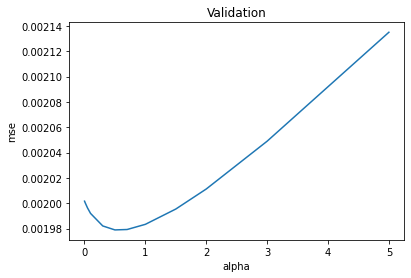

In [96]:
#Ridge regression
def mse_cv(model):
    mse= -cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
    return(mse)

model_ridge = Ridge()
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5,0.7, 1, 1.5,2, 3, 5]
cv_ridge = [mse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("mse")

In [28]:
#Lasso regression
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
result = mse_cv(model_lasso).mean()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expec

In [97]:
print('So for the Ridge regression we get a mse of about', cv_ridge.min())
print('So for the Lasso regression we get a mse of about', result)

So for the Ridge regression we get a mse of about 0.001978938461593651
So for the Lasso regression we get a mse of about 0.002157032304459703


##**Predictions**

In [50]:
#Prepare Test data
test_df = pd.read_csv('/content/test.csv')
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [51]:
test_df.shape

(1459, 80)

In [52]:
col_1 = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
         'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea','MasVnrType']

In [53]:
#Drop cols that are not in test data
test_df.drop(columns=col1, axis = 1, inplace=True)
test_df.drop(columns=col_1, axis = 1, inplace=True)
print('Shape: ', test_df.shape, '\n')
print(test_df.columns)

Shape:  (1459, 44) 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [54]:
# Fill null values
test_df['MSZoning'].fillna(value=test_df['MSZoning'].value_counts().index[0], inplace=True)
test_df['BsmtFullBath'].fillna(value=test_df['BsmtFullBath'].mean(), inplace=True)
test_df['GarageArea'].fillna(value=test_df['GarageArea'].mean(), inplace=True)
test_df['TotalBsmtSF'].fillna(value=test_df['TotalBsmtSF'].mean(), inplace=True)
test_df['BsmtUnfSF'].fillna(value=test_df['BsmtUnfSF'].mean(), inplace=True)
test_df['BsmtFinSF2'].fillna(value=test_df['BsmtFinSF2'].mean(), inplace=True)
test_df['BsmtFinSF1'].fillna(value=test_df['BsmtFinSF1'].mean(), inplace=True)
test_df['KitchenQual'].fillna(value=test_df['KitchenQual'].value_counts().index[0], inplace=True)
test_df['Exterior1st'].fillna(value=test_df['Exterior1st'].value_counts().index[0], inplace=True)
test_df['GarageCars'].fillna(value=test_df['GarageCars'].mean(), inplace=True)


In [55]:
#Reducing cardinality of categorical features
test_df['MSSubClass']= test_df['MSSubClass'].astype(str)
test_df['MSSubClass'] = pd.DataFrame(['50' if (x not in ['20', '60']) else x for x in test_df['MSSubClass']])

test_df['MSZoning'] = pd.DataFrame(['RM' if (x not in ['RL']) else x for x in test_df['MSZoning']])

test_df['LotShape'] = pd.DataFrame(['IR1' if (x not in ['Reg']) else x for x in test_df['LotShape']])

test_df['LotConfig'] = pd.DataFrame(['Corner' if (x not in ['Inside']) else x for x in test_df['LotConfig']])

test_df['Neighborhood'] = pd.DataFrame(['other' if (x not in ['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert', 'NridgHt']) else x for x in test_df['Neighborhood']])

test_df['BldgType'] = pd.DataFrame(['TwnhsE' if (x not in ['1Fam']) else x for x in test_df['BldgType']])

test_df['HouseStyle'] = pd.DataFrame(['1.5Fin' if (x not in ['1Story', '2Story']) else x for x in test_df['HouseStyle']])

test_df['OverallQual']= test_df['OverallQual'].astype(str)
test_df['OverallQual'] = pd.DataFrame(['4' if (x not in ['4', '5', '6', '7', '8', '9', '10']) else x for x in test_df['OverallQual']])
test_df['OverallQual'] = pd.DataFrame(['9' if (x not in ['4', '5', '6', '7', '8', '9']) else x for x in test_df['OverallQual']])

test_df['OverallCond']= test_df['OverallCond'].astype(str)
test_df['OverallCond'] = pd.DataFrame(['4' if (x not in ['4', '5', '6', '7', '8', '9']) else x for x in test_df['OverallCond']])
test_df['OverallCond'] = pd.DataFrame(['8' if (x not in ['4', '5', '6', '7', '8']) else x for x in test_df['OverallCond']])

test_df['RoofStyle'] = pd.DataFrame(['Hip' if (x not in ['Gable']) else x for x in test_df['RoofStyle']])

test_df['Exterior1st'] = pd.DataFrame(['other' if (x not in ['VinylSd', 'HdBoard', 'MetalSd','Wd Sdng', 'Plywood']) else x for x in test_df['Exterior1st']])

test_df['ExterQual'] = pd.DataFrame(['TA' if (x not in ['TA', 'Gd', 'Ex']) else x for x in test_df['ExterQual']])
test_df['ExterQual'] = pd.DataFrame(['Gd' if (x not in ['TA','Gd']) else x for x in test_df['ExterQual']])

test_df['Foundation'] = pd.DataFrame(['other' if (x not in ['PConc', 'CBlock', 'BrkTil']) else x for x in test_df['Foundation']])

test_df['HeatingQC'] = pd.DataFrame(['TA' if (x not in ['TA','Gd','Ex']) else x for x in test_df['HeatingQC']])

test_df['BsmtFullBath']= test_df['BsmtFullBath'].astype(str)
test_df['BsmtFullBath'] = pd.DataFrame(['1' if (x not in ['0']) else x for x in test_df['BsmtFullBath']])

test_df['FullBath']= test_df['FullBath'].astype(str)
test_df['FullBath'] = pd.DataFrame(['1' if (x not in ['2','3', '1']) else x for x in test_df['FullBath']])
test_df['FullBath'] = pd.DataFrame(['2' if (x not in ['2', '1']) else x for x in test_df['FullBath']])

test_df['HalfBath']= test_df['HalfBath'].astype(str)
test_df['HalfBath'] = pd.DataFrame(['0' if (x not in ['0','1']) else x for x in test_df['HalfBath']])

test_df['BedroomAbvGr']= test_df['BedroomAbvGr'].astype(str)
test_df['BedroomAbvGr'] = pd.DataFrame(['2' if (x not in ['3', '4', '5', '6', '8']) else x for x in test_df['BedroomAbvGr']])
test_df['BedroomAbvGr'] = pd.DataFrame(['4' if (x not in ['2', '3', '4']) else x for x in test_df['BedroomAbvGr']])

test_df['KitchenQual'] = pd.DataFrame(['TA' if (x not in ['Gd','Ex', 'Ta']) else x for x in test_df['KitchenQual']])

test_df['TotRmsAbvGrd']= test_df['TotRmsAbvGrd'].astype(str)
test_df['TotRmsAbvGrd'] = pd.DataFrame(['4' if (x not in ['4', '5', '6', '7', '8', '9', '10', '11', '12','14']) else x for x in test_df['TotRmsAbvGrd']])
test_df['TotRmsAbvGrd'] = pd.DataFrame(['9' if (x not in ['4', '5', '6', '7', '8', '9']) else x for x in test_df['TotRmsAbvGrd']])

test_df['Fireplaces']= test_df['Fireplaces'].astype(str)
test_df['Fireplaces'] = pd.DataFrame(['2' if (x not in ['0', '1', '2']) else x for x in test_df['Fireplaces']])

test_df['GarageCars']= test_df['GarageCars'].astype(str)
test_df['GarageCars'] = pd.DataFrame(['1' if (x not in ['1', '2', '3', '4']) else x for x in test_df['GarageCars']])
test_df['GarageCars'] = pd.DataFrame(['3' if (x not in ['1','2', '3']) else x for x in test_df['GarageCars']])


In [56]:
#Check for null values
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']>0]

,Total,Percent


In [57]:
print('Shape: ', test_df.shape, '\n')
print(test_df.columns)

Shape:  (1459, 44) 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [92]:
test_data = pd.get_dummies(test_df,drop_first=True)
print('Shape: ', test_data.shape, '\n')
print(test_data.columns)

Shape:  (1459, 71) 

Index(['Id', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSSubClass_50', 'MSSubClass_60', 'MSZoning_RM',
       'LotShape_Reg', 'LotConfig_Inside', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_NAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_other',
       'BldgType_TwnhsE', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_9', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'RoofStyle_Hip', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_other', 'E

In [89]:
train_df.columns.difference(test_data.columns)


Index(['BsmtFullBath_1', 'GarageCars_2', 'GarageCars_3', 'SalePrice'], dtype='object')

In [90]:
df = pd.DataFrame(data = 0, columns=['BsmtFullBath_1', 'GarageCars_2', 'GarageCars_3'],
                  index=range(0, 1460))
df

,BsmtFullBath_1,GarageCars_2,GarageCars_3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1455,0,0,0
1456,0,0,0
1457,0,0,0
1458,0,0,0


In [93]:
test_data.insert(loc=58, column='BsmtFullBath_1', value = df.BsmtFullBath_1)
test_data = test_data.assign(GarageCars_2=df.GarageCars_2,
                 GarageCars_3 = df.GarageCars_3)
test_data

,Id,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_50,MSSubClass_60,MSZoning_RM,LotShape_Reg,LotConfig_Inside,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_other,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Hip,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_other,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_other,HeatingQC_Gd,HeatingQC_TA,BsmtFullBath_1,FullBath_2,HalfBath_1,BedroomAbvGr_3,BedroomAbvGr_4,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,Fireplaces_1,Fireplaces_2,GarageCars_2,GarageCars_3
0,1461,11622,1961,1961,468.0,144.0,270.0,882.0,896,0,0,896,730.0,140,0,0,0,120,0,0,6,2010,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
1,1462,14267,1958,1958,923.0,0.0,406.0,1329.0,1329,0,0,1329,312.0,393,36,0,0,0,0,12500,6,2010,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0
2,1463,13830,1997,1998,791.0,0.0,137.0,928.0,928,701,0,1629,482.0,212,34,0,0,0,0,0,3,2010,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0
3,1464,9978,1998,1998,602.0,0.0,324.0,926.0,926,678,0,1604,470.0,360,36,0,0,0,0,0,6,2010,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0
4,1465,5005,1992,1992,263.0,0.0,1017.0,1280.0,1280,0,0,1280,506.0,0,82,0,0,144,0,0,1,2010,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1936,1970,1970,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0,0,0,0,0,0,0,6,2006,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0
1455,2916,1894,1970,1970,252.0,0.0,294.0,546.0,546,546,0,1092,286.0,0,24,0,0,0,0,0,4,2006,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0
1456,2917,20000,1960,1996,1224.0,0.0,0.0,1224.0,1224,0,0,1224,576.0,474,0,0,0,0,0,0,9,2006,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
1457,2918,10441,1992,1992,337.0,0.0,575.0,912.0,970,0,0,970,0.0,80,32,0,0,0,0,700,7,2006,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0


In [94]:
#Transform the test data
X_test_final = test_data.drop(columns=['Id'],axis=1)
X_test_final = pd.DataFrame(Xscaler.transform(X_test_final),columns=col_name_new)

In [98]:
cv_ridge

0.001    0.002002
0.005    0.002001
0.010    0.002001
0.050    0.001996
0.100    0.001992
0.300    0.001982
0.500    0.001979
0.700    0.001979
1.000    0.001983
1.500    0.001995
2.000    0.002011
3.000    0.002049
5.000    0.002135
dtype: float64

In [99]:
# define model
final_model = Ridge(alpha=0.5)
# fit model
final_model.fit(X_train, y_train)
# make a prediction
final_y = final_model.predict(X_test_final)

In [105]:
#Prediction
ridge_results = pd.DataFrame(Yscaler.inverse_transform(pd.DataFrame(final_y)), columns=['SalesPrice'])
ridge_results = pd.DataFrame(np.expm1(ridge_results['SalesPrice']))
ridge_results

,SalesPrice
0,120222.669475
1,116559.891075
2,188849.390768
3,203510.016838
4,181293.334035
...,...
1454,99446.435488
1455,98658.592260
1456,184161.994553
1457,121862.124613


In [108]:
#Prepare dataframe
submission = pd.DataFrame()
submission['Id'] = test_data['Id']
submission['SalePrice'] = ridge_results
submission

,Id,SalePrice
0,1461,120222.669475
1,1462,116559.891075
2,1463,188849.390768
3,1464,203510.016838
4,1465,181293.334035
...,...,...
1454,2915,99446.435488
1455,2916,98658.592260
1456,2917,184161.994553
1457,2918,121862.124613


In [109]:
#Convert to csv
submission.to_csv('submission.csv',index=False)